<a href="https://colab.research.google.com/github/ateffal/omdena-projects/blob/main/Heat%20waves%20and%20cold%20spells%20projections%20in%20Europe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The puspose of this notebook is to show how to read a .nc file, understand it and plot it.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q cftime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
import cftime
import matplotlib.pyplot as plt
import datetime

In [ ]:
# Load the netCDF file using xarray
file_path = '/content/drive/MyDrive/Valutus/Valutus/src/tasks/task-2/prAdjust_ymonmean_rel_QM-EFAS-Meteo-EUR-11_ICHEC-EC-EARTH_rcp45_r12i1p1_CLMcom-CCLM4-8-17-v1_2011-2040_1971-2000_grid5km_v1.nc'
ds = xr.open_dataset(file_path, decode_times=False)

# Display the dataset structure
ds

<xarray.Dataset>
Dimensions:            (y: 950, x: 1000, time: 12)
Coordinates:
    lon                (y, x) float32 ...
    lat                (y, x) float32 ...
  * time               (time) float64 2.212e+09 2.214e+09 ... 2.241e+09
Dimensions without coordinates: y, x
Data variables:
    prAdjust_ymonmean  (time, y, x) float32 ...
Attributes: (12/42)
    CDI:                        Climate Data Interface version 1.8.2 (http://...
    CDO:                        Climate Data Operators version 1.8.2 (http://...
    creation_date:              2020-02-12T15:04:49ZCET+0100
    Conventions:                CF-1.6
    institution_url:            www.smhi.se
    invar_platform_id:          -
    ...                         ...
    project_id:                 C3S_424_SMHI
    references:                 
    invar_experiment_id:        rcp45
    invar_realisation_id:       r12i1p1
    invar_rcm_model_id:         CLMcom-CCLM4-8-17-v1
    variable_name:              prAdjust_ymonmean

# Variables and coordinates availble in the .nc file

In [ ]:
# variables
variables = list(ds.variables)
print('variables : ', variables)
# coordinates
coordinates = list(ds.coords)
print('cordinates : ', coordinates)

variables :  ['lon', 'lat', 'time', 'prAdjust_ymonmean']
cordinates :  ['lon', 'lat', 'time']


In [ ]:
# shape of each variables
for v in variables :
  print('shape of ' , v,  ds[v].shape)


shape of  lon (950, 1000)
shape of  lat (950, 1000)
shape of  time (12,)
shape of  prAdjust_ymonmean (12, 950, 1000)


# Take a look at some values

In [ ]:
# time is in number format, so we need to convert it
for t in ds[variables[2]].values:
  print(datetime.datetime.fromtimestamp(t))

2040-01-31 12:00:00
2040-02-29 12:00:00
2040-03-31 12:00:00
2040-04-30 12:00:00
2040-05-31 12:00:00
2040-06-30 12:00:00
2040-07-31 12:00:00
2040-08-31 12:00:00
2040-09-30 12:00:00
2040-10-31 12:00:00
2040-11-30 12:00:00
2040-12-31 12:00:00


In [ ]:
ds[variables[2]].values

array([2.2116240e+09, 2.2141296e+09, 2.2168080e+09, 2.2194000e+09,
       2.2220784e+09, 2.2246704e+09, 2.2273488e+09, 2.2300272e+09,
       2.2326192e+09, 2.2352976e+09, 2.2378896e+09, 2.2405680e+09])

In [ ]:
# lon
ds[variables[0]].values

array([[ -8.229275,  -8.180322,  -8.131361, ...,  41.047688,  41.0937  ,
         41.139706],
       [ -8.238522,  -8.189548,  -8.140564, ...,  41.061943,  41.107975,
         41.15399 ],
       [ -8.247785,  -8.198788,  -8.149782, ...,  41.076225,  41.122272,
         41.168304],
       ...,
       [-34.88283 , -34.793133, -34.703255, ...,  73.6889  ,  73.74297 ,
         73.79696 ],
       [-34.958313, -34.868584, -34.77867 , ...,  73.759285,  73.81332 ,
         73.86726 ],
       [-35.034023, -34.944263, -34.85432 , ...,  73.82979 ,  73.88378 ,
         73.937675]], dtype=float32)

In [ ]:
# prAdjust_ymonmean
ds[variables[3]].values

array([[[-75.33388 , -73.94457 , -74.58843 , ...,        nan,
                nan,        nan],
        [-74.63545 , -74.07783 , -73.86636 , ...,        nan,
                nan,        nan],
        [-75.27271 , -76.82944 , -76.37182 , ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[ 22.511963,  32.679676,  37.81505 , ...,        nan,
                nan,        nan],
        [ 32.195282,  26.950502,  40.427273, ...,        nan,
                nan,        nan],
        [ 26.281536,  24.5572  ,  23.539442, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [   

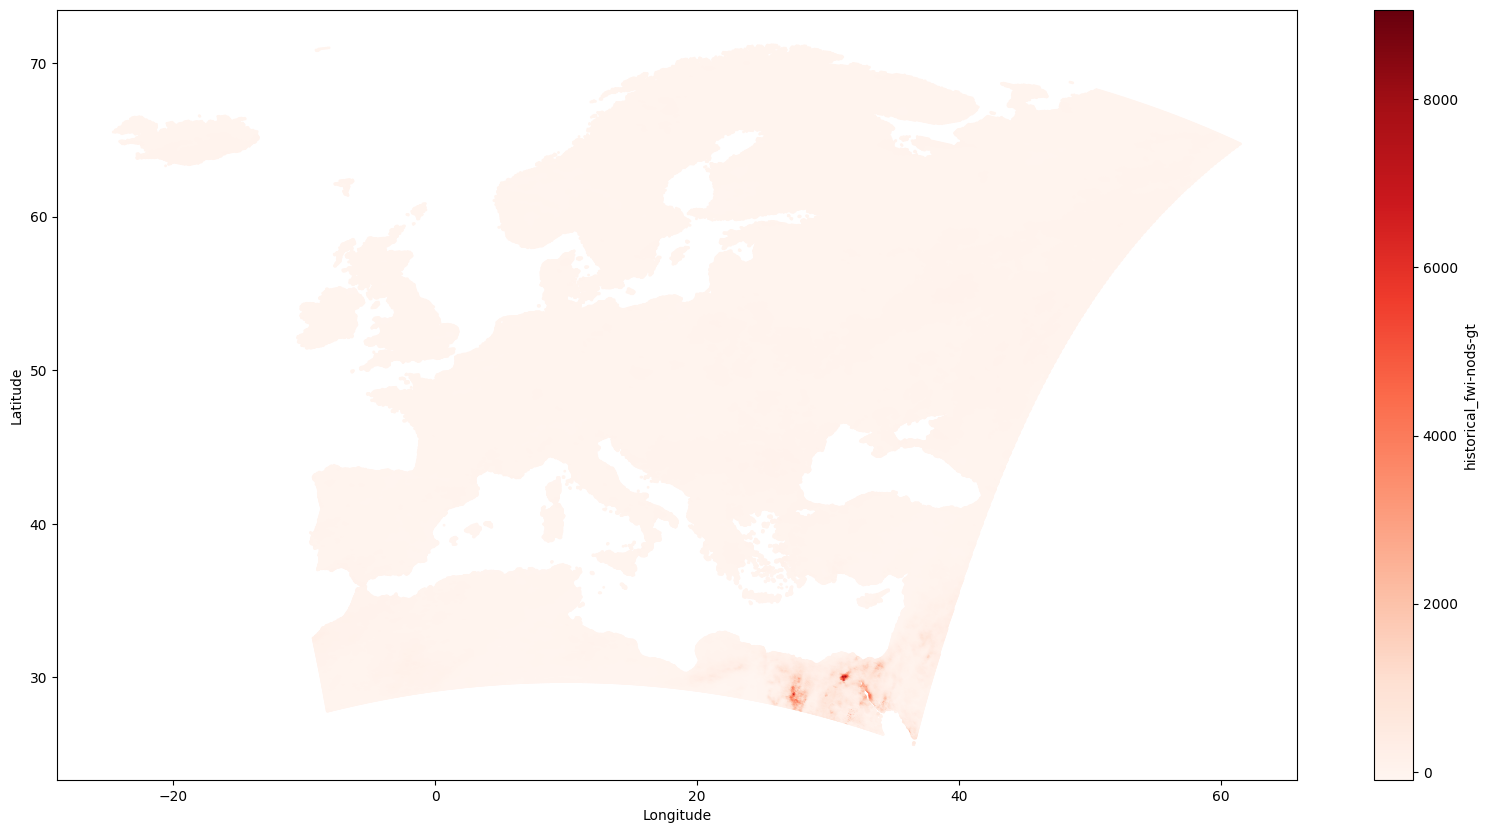

In [ ]:
# Create a scatter plot of shoreline retreat
plt.figure(figsize=(20, 10))
plt.scatter(ds['lon'], ds['lat'], c=ds['prAdjust_ymonmean'][8,:,:], cmap='Reds', s=1)
plt.colorbar(label='historical_fwi-nods-gt')
# plt.title(f'Shoreline Retreat in {year} ({rcp}, {percentile}th percentile)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Create a corresponding pandas Dataframe

In [ ]:
times = []
lon = []
lat = []
prAdjust_ymonmean = []
for t in range(12):
  for x in range(100):
    for y in range(100):
      tt = ds['prAdjust_ymonmean'][t,:,:][x,y]['time'].values
      tt = datetime.datetime.fromtimestamp(int(tt))
      # print('time = ', tt)
      # print('lon = ', ds['prAdjust_ymonmean'][t,:,:][x,y]['lon'].values)
      # print('lat = ', ds['prAdjust_ymonmean'][t,:,:][x,y]['lat'].values)
      # print('precipitation = ', ds['prAdjust_ymonmean'][t,:,:][x,y].values)
      # print('------------------------------------------------------------------------')
      times.append(tt)
      lon.append(ds['prAdjust_ymonmean'][t,:,:][x,y]['lon'].values)
      lat.append(ds['prAdjust_ymonmean'][t,:,:][x,y]['lat'].values)
      prAdjust_ymonmean.append(ds['prAdjust_ymonmean'][t,:,:][x,y].values)

precipitation_df = pd.DataFrame({'time' : times,'longitude' : lon, 'latitude' : lat, 'prAdjust_ymonmean' : prAdjust_ymonmean})

In [ ]:
# take a look at a sample
precipitation_df.sample(10)


,time,longitude,latitude,prAdjust_ymonmean
75550,2040-08-31 12:00:00,-6.2375784,30.765316,-8.65024
97931,2040-10-31 12:00:00,-7.4290776,31.651136,-6.2230816
47574,2040-05-31 12:00:00,-5.185747,31.880835,-24.974201
24220,2040-03-31 12:00:00,-7.63099,29.888865,24.19622
56548,2040-06-30 12:00:00,-6.4291587,31.19381,-54.073723
69745,2040-07-31 12:00:00,-6.8836265,32.592716,170.7678
115816,2040-12-31 12:00:00,-7.985884,30.561283,-0.35705858
5214,2040-01-31 12:00:00,-8.028059,30.272999,-50.564163
117958,2040-12-31 12:00:00,-6.0442014,31.914305,-19.586515
71707,2040-08-31 12:00:00,-8.043045,28.637098,-18.982464


In [ ]:
# export it
precipitation_df.to_csv('/content/drive/MyDrive/Valutus/Valutus/src/tasks/task-2/Amine output/precipitation_sample.csv')

# Other way to read a .nc file - using netCDF package

In [ ]:
!pip install -q netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 25.1 MB/s eta 0:00:00


In [ ]:
import netCDF4

In [ ]:
f = netCDF4.Dataset(file_path)
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    CDI: Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/cdi)
    CDO: Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/cdo)
    creation_date: 2020-02-12T15:04:49ZCET+0100
    Conventions: CF-1.6
    institution_url: www.smhi.se
    invar_platform_id: -
    invar_rcm_model_driver: ICHEC-EC-EARTH
    reference_period: 1971-2000
    time_coverage_start: 2011
    time_coverage_end: 2040
    domain: EUR-11
    geospatial_lat_min: 23.942343
    geospatial_lat_max: 72.641624
    geospatial_lat_resolution: 0.04268074 degree
    geospatial_lon_min: -35.034023
    geospatial_lon_max: 73.937675
    geospatial_lon_resolution: 0.009246826 degree
    geospatial_bounds: -
    NCO: netCDF Operators version 4.7.7 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)
    acknowledgements: This work was performed within Copernicus Climate Change Service - global impacts C3S_424_SMHI, ht

In [ ]:
# variables
list(f.variables)

['lon', 'lat', 'time', 'prAdjust_ymonmean']

In [ ]:
f['prAdjust_ymonmean'][0,:,:][100,10]

-6.5885277

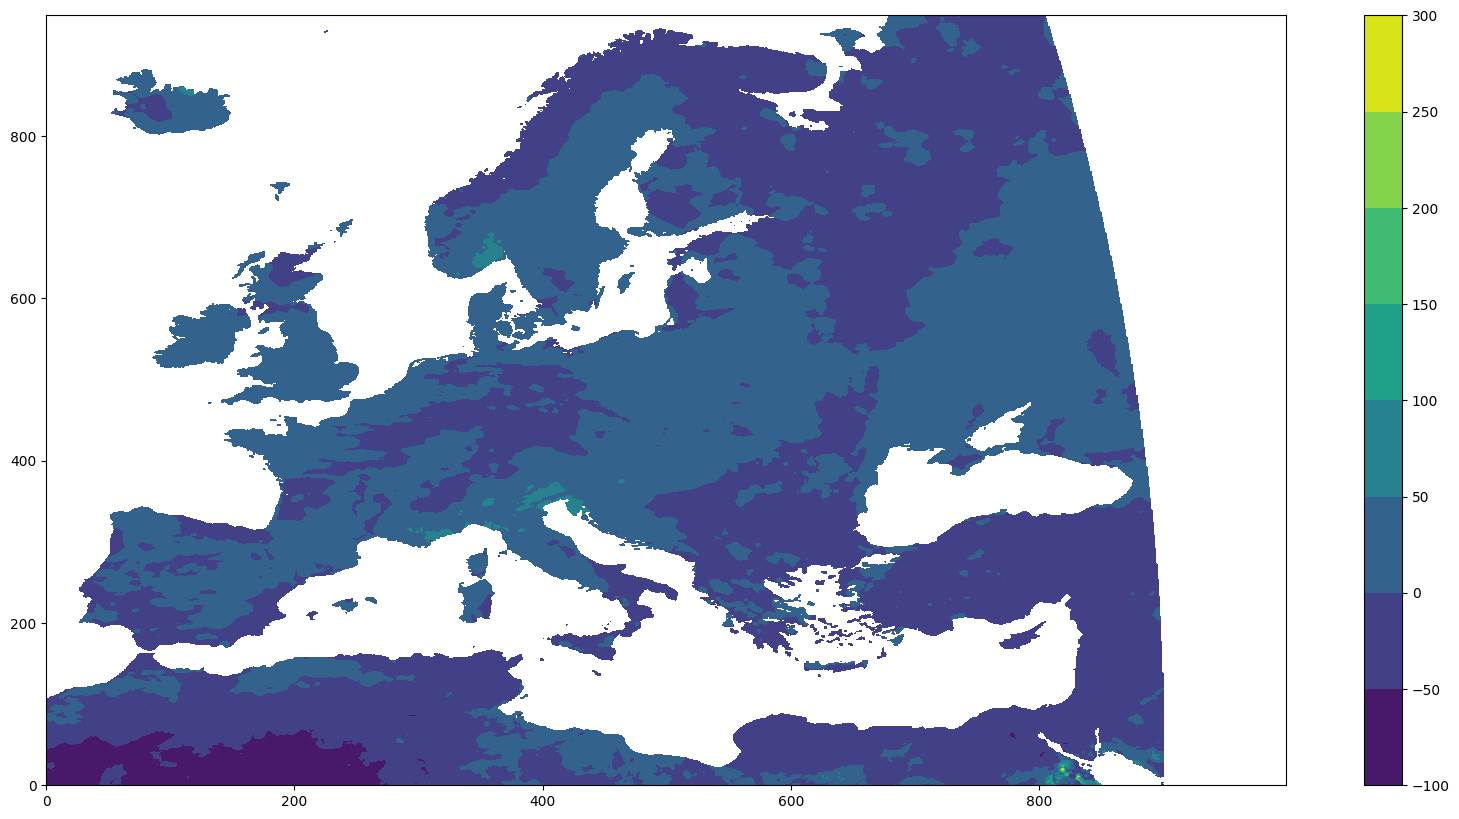

In [ ]:
plt.figure(figsize=(20, 10))
cs = plt.contourf(f['prAdjust_ymonmean'][0,:,:])
plt.colorbar()

# Ploting locations

In [ ]:
import geopandas as gpd

In [ ]:
# number of points
n = 100000

In [ ]:
locations_df = pd.DataFrame({'longitude' : ds['lon'].values.flatten()[:n], 'latitude' : ds['lat'].values.flatten()[:n]})
locations_df.head()

,longitude,latitude
0,-8.229275,27.802845
1,-8.180322,27.813362
2,-8.131361,27.823853
3,-8.082390,27.834314
4,-8.033411,27.844748


In [ ]:
locations_geodf = gpd.GeoDataFrame(locations_df, geometry = gpd.points_from_xy(locations_df.longitude, locations_df.latitude))

In [ ]:
world_data = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

<ipython-input-27-96299a43d306>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


<Axes: >

<Figure size 2000x2000 with 0 Axes>

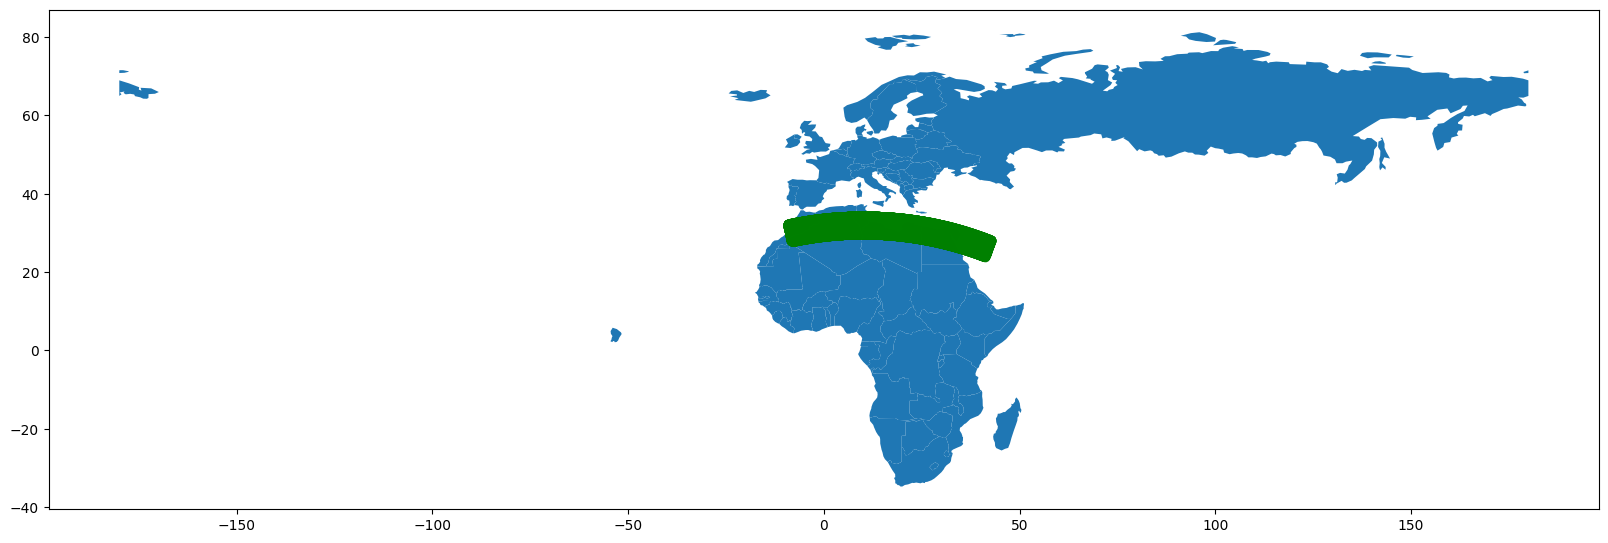

In [ ]:
plt.figure(figsize=(20, 20))
axis = world_data[(world_data.continent == 'Europe') | (world_data.continent == 'Africa')].plot(figsize=(20, 20))
locations_geodf.plot(ax=axis, color="green", alpha=0.8)

# Other simpler way to transform .nc files to dataframe ( Sukriti [notebook](https://colab.research.google.com/drive/1a76pLffnpDSGzGywaNmecAoBBEbmOF1I#scrollTo=rygrCkS-3RbW) )

In [ ]:
precipitation_df_2 = ds.to_dataframe().reset_index()

In [ ]:
precipitation_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11400000 entries, 0 to 11399999
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   y                  int64  
 1   x                  int64  
 2   time               float64
 3   lon                float32
 4   lat                float32
 5   prAdjust_ymonmean  float32
dtypes: float32(3), float64(1), int64(2)
memory usage: 391.4 MB


In [ ]:
precipitation_df_2.sample(20)

,y,x,time,lon,lat,prAdjust_ymonmean
8862172,738,514,2.222078e+09,24.583950,62.379742,-2.774047
2300423,191,701,2.240568e+09,28.885258,36.555786,NaN
8213307,684,442,2.219400e+09,17.112068,60.475937,13.716753
7078637,589,886,2.224670e+09,48.441658,49.993904,NaN
9250755,770,896,2.219400e+09,56.759697,56.265823,NaN
2720557,226,713,2.214130e+09,29.982502,37.950886,30.022297
2338210,194,850,2.237890e+09,36.843468,34.690155,1.280156
8434973,702,914,2.224670e+09,54.666782,53.434418,NaN
8976231,748,19,2.219400e+09,-22.025690,59.938095,NaN
5038314,419,859,2.227349e+09,41.832962,43.881588,-2.869041


In [ ]:
# transform time to date
precipitation_df_2['time'] = precipitation_df_2['time'].apply(datetime.datetime.fromtimestamp)

In [ ]:
precipitation_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11400000 entries, 0 to 11399999
Data columns (total 6 columns):
 #   Column             Dtype         
---  ------             -----         
 0   y                  int64         
 1   x                  int64         
 2   time               datetime64[ns]
 3   lon                float32       
 4   lat                float32       
 5   prAdjust_ymonmean  float32       
dtypes: datetime64[ns](1), float32(3), int64(2)
memory usage: 391.4 MB


In [ ]:
# select some point x and y
x = 514
y = 738
some_point = precipitation_df_2[(precipitation_df_2['x']==x) & (precipitation_df_2['y']==y)]
some_point

,y,x,time,lon,lat,prAdjust_ymonmean
8862168,738,514,2040-01-31 12:00:00,24.58395,62.379742,-1.459034
8862169,738,514,2040-02-29 12:00:00,24.58395,62.379742,5.797977
8862170,738,514,2040-03-31 12:00:00,24.58395,62.379742,9.314105
8862171,738,514,2040-04-30 12:00:00,24.58395,62.379742,13.377981
8862172,738,514,2040-05-31 12:00:00,24.58395,62.379742,-2.774047
8862173,738,514,2040-06-30 12:00:00,24.58395,62.379742,-3.564116
8862174,738,514,2040-07-31 12:00:00,24.58395,62.379742,-18.702005
8862175,738,514,2040-08-31 12:00:00,24.58395,62.379742,-20.032812
8862176,738,514,2040-09-30 12:00:00,24.58395,62.379742,-23.811537
8862177,738,514,2040-10-31 12:00:00,24.58395,62.379742,-12.348195


<Axes: >

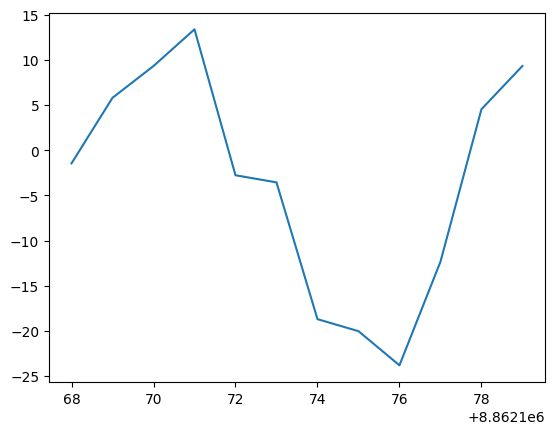

In [ ]:
some_point['prAdjust_ymonmean'].plot()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
some_point['prAdjust_ymonmean']

8862168    -1.459034
8862169     5.797977
8862170     9.314105
8862171    13.377981
8862172    -2.774047
8862173    -3.564116
8862174   -18.702005
8862175   -20.032812
8862176   -23.811537
8862177   -12.348195
8862178     4.530553
8862179     9.318515
Name: prAdjust_ymonmean, dtype: float32

<ipython-input-73-8b0a6b7c8eec>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ts = pd.Series(some_point['prAdjust_ymonmean'],index=pd.date_range('31/01/2040', '31/12/2040', freq='M'))


<Axes: >

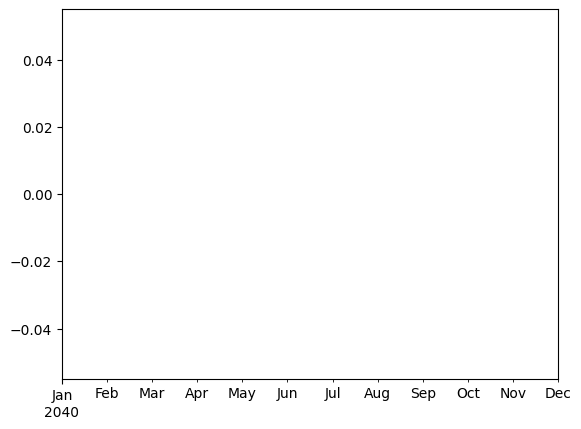

In [ ]:
ts = pd.Series(some_point['prAdjust_ymonmean'],index=pd.date_range('31/01/2040', '31/12/2040', freq='M'))
ts.plot()

In [ ]:
# number of nas
precipitation_df_2.isna().sum()

lon                        0
lat                        0
prAdjust_ymonmean    5443319
dtype: int64

In [ ]:
precipitation_df_2[precipitation_df_2['prAdjust_ymonmean'].isna()]

lon        lat  prAdjust_ymonmean
y   x   time                                                 
0   578 2.227349e+09  20.825548  29.060722                NaN
    579 2.227349e+09  20.875631  29.054426                NaN
    580 2.227349e+09  20.925707  29.048101                NaN
    585 2.227349e+09  21.175997  29.016041                NaN
    586 2.227349e+09  21.226036  29.009542                NaN
...                         ...        ...                ...
949 999 2.230027e+09  73.937675  58.246738                NaN
        2.232619e+09  73.937675  58.246738                NaN
        2.235298e+09  73.937675  58.246738                NaN
        2.237890e+09  73.937675  58.246738                NaN
        2.240568e+09  73.937675  58.246738                NaN

[5443319 rows x 3 columns]

In [ ]:
len(precipitation_df_2)

11400000